In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import IFrame

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler


pd.options.plotting.backend = 'matplotlib'

#pd.options.plotting.backend = "plotly"

from sklearn.model_selection import train_test_split

import scipy.stats as stats

from statsmodels.stats import weightstats as stests

from sklearn.feature_selection import RFE

In [113]:
df = pd.read_csv('bb_msd_merged.csv',index_col=0)

In [114]:
df.head()

,Track,Artist,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,loudness,is_hit
SpotifyID,,,,,,,,,,,,,,,
58spuRyMUsjKHQHEGwLC99,80s Mercedes,Maren Morris,0.485,0.834,9,1,0.0715,0.0665,0.000,0.2800,0.659,90.933,211767,-5.413,1
6LdR1UYMIqsaaUt0hiWVBN,Dio Nisia,Giorgos Sabanis,0.691,0.762,2,1,0.0285,0.0808,0.000,0.1340,0.529,116.024,248427,-7.321,0
3gQRcZZeBCMGANY1wT2x6A,Hooked On A Feeling (Ooga-Chaka),Baby Talk,0.613,0.678,8,1,0.1060,0.5420,0.000,0.0391,0.911,118.629,181107,-7.850,1
54p39OJ544KF6iFeCzbVjs,Tennessee Rain,Addison Agen,0.553,0.232,9,1,0.0326,0.9070,0.000,0.1230,0.274,137.800,210986,-6.929,1
5JxJQxSxpK3B7ShOV2bz9f,French Touch,Richard Galliano,0.647,0.567,4,0,0.0388,0.4070,0.441,0.1510,0.674,113.256,210720,-10.191,0


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14530 entries, 58spuRyMUsjKHQHEGwLC99 to 0WC05B34BCl3ue6NV0IdU7
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track             14530 non-null  object 
 1   Artist            14530 non-null  object 
 2   danceability      14530 non-null  float64
 3   energy            14530 non-null  float64
 4   key               14530 non-null  int64  
 5   mode              14530 non-null  int64  
 6   speechiness       14530 non-null  float64
 7   acousticness      14530 non-null  float64
 8   instrumentalness  14530 non-null  float64
 9   liveness          14530 non-null  float64
 10  valence           14530 non-null  float64
 11  tempo             14530 non-null  float64
 12  duration_ms       14530 non-null  int64  
 13  loudness          14530 non-null  float64
 14  is_hit            14530 non-null  int64  
dtypes: float64(9), int64(4), object(2)
memory usage: 1.8+ 

In [116]:
df_usable = df.drop(['Track','Artist'],axis=1)

In [117]:
df_usable.head()

,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,loudness,is_hit
SpotifyID,,,,,,,,,,,,,
58spuRyMUsjKHQHEGwLC99,0.485,0.834,9,1,0.0715,0.0665,0.000,0.2800,0.659,90.933,211767,-5.413,1
6LdR1UYMIqsaaUt0hiWVBN,0.691,0.762,2,1,0.0285,0.0808,0.000,0.1340,0.529,116.024,248427,-7.321,0
3gQRcZZeBCMGANY1wT2x6A,0.613,0.678,8,1,0.1060,0.5420,0.000,0.0391,0.911,118.629,181107,-7.850,1
54p39OJ544KF6iFeCzbVjs,0.553,0.232,9,1,0.0326,0.9070,0.000,0.1230,0.274,137.800,210986,-6.929,1
5JxJQxSxpK3B7ShOV2bz9f,0.647,0.567,4,0,0.0388,0.4070,0.441,0.1510,0.674,113.256,210720,-10.191,0


#### Separating features and target

In [118]:
y = df_usable['is_hit']

X = df_usable.drop('is_hit',axis=1)

##### Checking target class weight

<AxesSubplot:>

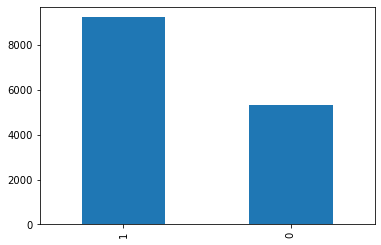

In [119]:
y.value_counts().plot(kind='bar')

#### data is not imbalanced , so no stratification or up and down sampling is needed.

#### Standardizing features

In [120]:
ss= StandardScaler()

In [121]:
Xs = ss.fit_transform(X)

Xs = pd.DataFrame(Xs,columns=X.columns)

##### Train test split using 67:33 ratio of train and test data.

In [122]:
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.33, random_state=1)

#### Checking dimensions of train and test data

In [123]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9735, 12), (4795, 12), (9735,), (4795,))

**GDA (Gaussian Discriminant Analysis) is a general term for both LDA (Linear Discriminant Analysis)
 and QDA (Quadratic Discriminant Analysis) where the likelihood probability of each observation given the class,
i.e., P(x|y) can be modeled by the multivariate Gaussian distribution.**

##### Linear Discriminant Analysis with all features

In [124]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()

lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [125]:
y_pred  = lda.predict(X_test)

In [126]:
y_pred_prob = lda.predict_proba(X_test)[:,1]

In [127]:
y_pred_prob

array([0.4474274 , 0.34471593, 0.82969671, ..., 0.82454464, 0.85926449,
       0.87413975])

In [128]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,roc_auc_score

In [129]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.45      0.59      1747
           1       0.75      0.95      0.84      3048

    accuracy                           0.77      4795
   macro avg       0.79      0.70      0.71      4795
weighted avg       0.78      0.77      0.75      4795



In [130]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 792,  955],
       [ 159, 2889]], dtype=int64)

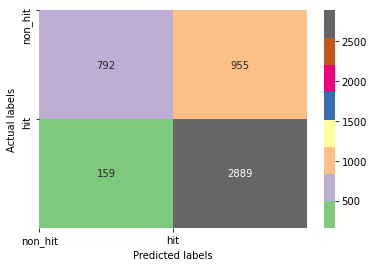

In [131]:
sns.heatmap(cm,annot=True,fmt='d',cmap='Accent')
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.xticks(ticks=[0,1],labels=['non_hit','hit'])
plt.yticks(ticks=[0,1],labels=['non_hit','hit'])
plt.show()

In [132]:
as1 = accuracy_score(y_test,y_pred)
as1

0.767674661105318

In [133]:
rs1 = roc_auc_score(y_test,y_pred_prob)
rs1

0.7925243424423121

##### Quadratic Discriminant Analysis with all features

In [134]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()

qda.fit(X_train, y_train)

QuadraticDiscriminantAnalysis()

In [135]:
y_pred  = qda.predict(X_test)

In [136]:
y_pred_prob = qda.predict_proba(X_test)[:,1]

In [137]:
y_pred_prob

array([0.1116889 , 0.20083369, 0.99206077, ..., 0.95262773, 0.97915294,
       0.97266957])

In [138]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,roc_auc_score

In [139]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.51      0.62      1747
           1       0.77      0.93      0.84      3048

    accuracy                           0.78      4795
   macro avg       0.78      0.72      0.73      4795
weighted avg       0.78      0.78      0.76      4795



In [140]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 889,  858],
       [ 220, 2828]], dtype=int64)

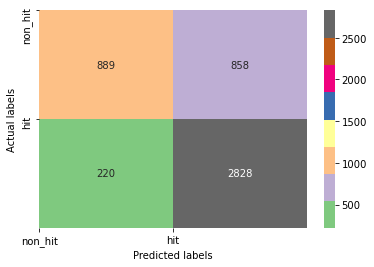

In [141]:
sns.heatmap(cm,annot=True,fmt='d',cmap='Accent')
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.xticks(ticks=[0,1],labels=['non_hit','hit'])
plt.yticks(ticks=[0,1],labels=['non_hit','hit'])
plt.show()

In [142]:
as2 = accuracy_score(y_test,y_pred)
as2

0.7751824817518248

In [143]:
rs2 = roc_auc_score(y_test,y_pred_prob)
rs2

0.8074160127522698

##### Checking Permutation importance for both lda and qda (Feature Selection)

In [144]:
import eli5
from eli5.sklearn import PermutationImportance

perm1 = PermutationImportance(lda, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm1, feature_names = X_test.columns.tolist())

Weight,Feature
0.0734 ± 0.0026,instrumentalness
0.0423 ± 0.0038,loudness
0.0408 ± 0.0038,acousticness
0.0355 ± 0.0058,danceability
0.0151 ± 0.0056,valence
0.0045 ± 0.0021,liveness
0.0025 ± 0.0030,duration_ms
0.0008 ± 0.0011,tempo
0.0002 ± 0.0006,key
0.0002 ± 0.0027,energy


In [145]:
import eli5
from eli5.sklearn import PermutationImportance

perm2 = PermutationImportance(qda, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm2, feature_names = X_test.columns.tolist())

Weight,Feature
0.0669 ± 0.0046,instrumentalness
0.0448 ± 0.0077,acousticness
0.0370 ± 0.0021,loudness
0.0297 ± 0.0043,energy
0.0284 ± 0.0033,duration_ms
0.0129 ± 0.0017,danceability
0.0099 ± 0.0041,valence
0.0095 ± 0.0029,liveness
0.0015 ± 0.0006,key
0.0004 ± 0.0034,speechiness


In [146]:
lda_feat = ['instrumentalness','loudness','acousticness','danceability','valence']
qda_feat = ['instrumentalness','acousticness','loudness','energy','duration_ms','valence','danceability','liveness']


##### Linear Discriminant Analysis with important features

In [147]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()

lda.fit(X_train[lda_feat], y_train)

LinearDiscriminantAnalysis()

In [148]:
y_pred  = lda.predict(X_test[lda_feat])

In [149]:
y_pred_prob = lda.predict_proba(X_test[lda_feat])[:,1]

In [150]:
y_pred_prob

array([0.46010388, 0.35874696, 0.79131417, ..., 0.86931273, 0.84939909,
       0.9190796 ])

In [151]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,roc_auc_score

In [152]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.44      0.58      1747
           1       0.75      0.95      0.84      3048

    accuracy                           0.76      4795
   macro avg       0.79      0.70      0.71      4795
weighted avg       0.78      0.76      0.74      4795



In [153]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 775,  972],
       [ 158, 2890]], dtype=int64)

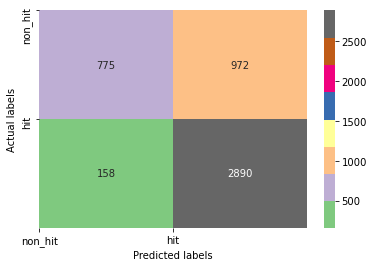

In [154]:
sns.heatmap(cm,annot=True,fmt='d',cmap='Accent')
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.xticks(ticks=[0,1],labels=['non_hit','hit'])
plt.yticks(ticks=[0,1],labels=['non_hit','hit'])
plt.show()

In [155]:
as3 = accuracy_score(y_test,y_pred)
as3

0.7643378519290928

In [156]:
rs3 = roc_auc_score(y_test,y_pred_prob)
rs3

0.783975003267694

##### Quadratic Discriminant Analysis with important features

In [157]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()

qda.fit(X_train[qda_feat], y_train)

QuadraticDiscriminantAnalysis()

In [158]:
y_pred  = qda.predict(X_test[qda_feat])

In [159]:
y_pred_prob = qda.predict_proba(X_test[qda_feat])[:,1]

In [160]:
y_pred_prob

array([0.09561224, 0.16069606, 0.98693506, ..., 0.96690818, 0.9444225 ,
       0.9918505 ])

In [161]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,roc_auc_score

In [162]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.52      0.63      1747
           1       0.77      0.93      0.84      3048

    accuracy                           0.78      4795
   macro avg       0.79      0.72      0.74      4795
weighted avg       0.78      0.78      0.76      4795



In [163]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 900,  847],
       [ 214, 2834]], dtype=int64)

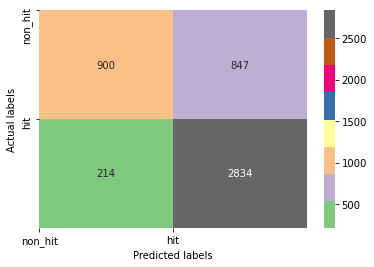

In [164]:
sns.heatmap(cm,annot=True,fmt='d',cmap='Accent')
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.xticks(ticks=[0,1],labels=['non_hit','hit'])
plt.yticks(ticks=[0,1],labels=['non_hit','hit'])
plt.show()

In [165]:
as4 = accuracy_score(y_test,y_pred)
as4

0.7787278415015642

In [166]:
rs4 = roc_auc_score(y_test,y_pred_prob)
rs4

0.8088755827387633

##### Logistic Regression model with all features

In [167]:
from sklearn.linear_model import LogisticRegression

In [168]:
lr = LogisticRegression(random_state=1)

lr.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [169]:
y_pred  = lr.predict(X_test)

In [170]:
y_pred_prob = lr.predict_proba(X_test)[:,1]

In [171]:
y_pred_prob

array([0.42368358, 0.2456046 , 0.81676436, ..., 0.82091926, 0.87007711,
       0.88021002])

In [172]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,roc_auc_score

In [173]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.51      0.62      1747
           1       0.77      0.92      0.84      3048

    accuracy                           0.77      4795
   macro avg       0.77      0.71      0.73      4795
weighted avg       0.77      0.77      0.76      4795



In [174]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 894,  853],
       [ 251, 2797]], dtype=int64)

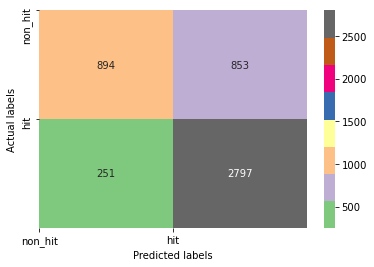

In [175]:
sns.heatmap(cm,annot=True,fmt='d',cmap='Accent')
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.xticks(ticks=[0,1],labels=['non_hit','hit'])
plt.yticks(ticks=[0,1],labels=['non_hit','hit'])
plt.show()

In [176]:
as5 = accuracy_score(y_test,y_pred)
as5

0.7697601668404588

In [177]:
rs5 = roc_auc_score(y_test,y_pred_prob)
rs5

0.7962198414379655

##### GridSearchCV for identifying Best number of Features to Select using RFE 

In [178]:
X_train.head()

,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,loudness
4465,0.022882,1.346725,-0.921705,0.693644,-0.537078,-0.820921,-0.354654,-0.540537,-0.631497,-0.324598,0.540929,1.019403
8772,0.874242,0.630738,-1.202039,0.693644,-0.557142,-0.611377,-0.354685,-0.656667,1.461530,-0.019946,-0.008178,0.167497
11794,0.742341,0.193708,-1.482373,0.693644,-0.603378,-0.591799,-0.354685,-0.589465,1.293596,-0.833724,-0.138051,-0.091024
9326,-1.344090,1.165404,0.479963,0.693644,-0.383540,-0.455110,-0.353448,-0.375478,-0.287438,-0.169325,1.035257,0.791369
6184,0.952183,1.146807,1.320964,-1.441662,0.747929,-0.773696,-0.354685,-0.741555,0.597286,-0.858911,-0.289954,1.150275


In [179]:
from sklearn.model_selection import GridSearchCV

lor = LogisticRegression(random_state=1)
rfe = RFE(lor)

params = [{'n_features_to_select': list(range(1, 13))}]

gsearch = GridSearchCV(rfe, param_grid=params, scoring='r2', cv=3, return_train_score=True)
gsearch.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RFE(estimator=LogisticRegression(random_state=1)),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12]}],
             return_train_score=True, scoring='r2')

In [180]:
gsearch.best_params_

{'n_features_to_select': 9}

In [181]:
pd.DataFrame(gsearch.cv_results_).iloc[:,4:].head(3)

,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1,{'n_features_to_select': 1},-0.195959,-0.269045,-0.273032,-0.246012,0.035430,12,-0.269045,-0.235160,-0.232502,-0.245569,0.016636
1,2,{'n_features_to_select': 2},-0.117557,-0.141476,-0.209247,-0.156093,0.038833,11,-0.171375,-0.156093,-0.121543,-0.149671,0.020844
2,3,{'n_features_to_select': 3},-0.064403,-0.076363,-0.140147,-0.093638,0.033248,10,-0.114235,-0.106262,-0.071712,-0.097403,0.018456


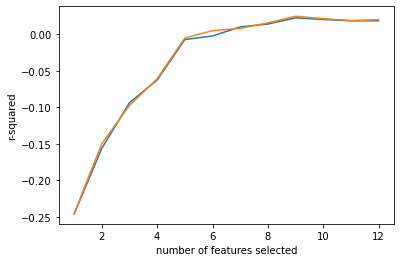

In [182]:
cvr = pd.DataFrame(gsearch.cv_results_).iloc[:,4:]

plt.plot(cvr['param_n_features_to_select'], cvr['mean_test_score'])
plt.plot(cvr['param_n_features_to_select'], cvr['mean_train_score'])
plt.xlabel('number of features selected')
plt.ylabel('r-squared')
plt.show()

In [183]:
lor = LogisticRegression(random_state=1)
rfe = RFE(lor, n_features_to_select=9)
rfe.fit(X_train, y_train)

rf = pd.DataFrame(rfe.ranking_, index=X.columns, columns=['rank'])
rf.sort_values(by='rank')

,rank
danceability,1
energy,1
speechiness,1
acousticness,1
instrumentalness,1
liveness,1
valence,1
duration_ms,1
loudness,1
tempo,2


In [184]:
lr_feat = list(rf.index[rf['rank']==1])
lr_feat

['danceability',
 'energy',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'duration_ms',
 'loudness']

##### Logistic Regression model with selective features

In [185]:
lr = LogisticRegression(random_state=1)

lr.fit(X_train[lr_feat], y_train)

LogisticRegression(random_state=1)

In [186]:
y_pred  = lr.predict(X_test[lr_feat])

In [187]:
y_pred_prob = lr.predict_proba(X_test[lr_feat])[:,1]

In [188]:
y_pred_prob

array([0.42798361, 0.25248847, 0.80593004, ..., 0.81416472, 0.8673921 ,
       0.86869734])

In [189]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,roc_auc_score

In [190]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.51      0.62      1747
           1       0.77      0.92      0.84      3048

    accuracy                           0.77      4795
   macro avg       0.77      0.71      0.73      4795
weighted avg       0.77      0.77      0.76      4795



In [191]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 893,  854],
       [ 250, 2798]], dtype=int64)

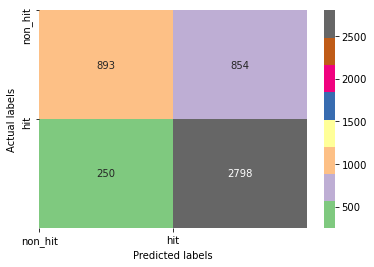

In [192]:
sns.heatmap(cm,annot=True,fmt='d',cmap='Accent')
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.xticks(ticks=[0,1],labels=['non_hit','hit'])
plt.yticks(ticks=[0,1],labels=['non_hit','hit'])
plt.show()

In [193]:
as6 = accuracy_score(y_test,y_pred)
as6

0.7697601668404588

In [194]:
rs6 = roc_auc_score(y_test,y_pred_prob)
rs6

0.795589589652753

#### Logistic Regression with feature selection based on lasso and DT based Feature Importance 

In [195]:
df=pd.read_csv('bb_msd_merged.csv')
df.head()

,SpotifyID,Track,Artist,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,loudness,is_hit
0,58spuRyMUsjKHQHEGwLC99,80s Mercedes,Maren Morris,0.485,0.834,9,1,0.0715,0.0665,0.000,0.2800,0.659,90.933,211767,-5.413,1
1,6LdR1UYMIqsaaUt0hiWVBN,Dio Nisia,Giorgos Sabanis,0.691,0.762,2,1,0.0285,0.0808,0.000,0.1340,0.529,116.024,248427,-7.321,0
2,3gQRcZZeBCMGANY1wT2x6A,Hooked On A Feeling (Ooga-Chaka),Baby Talk,0.613,0.678,8,1,0.1060,0.5420,0.000,0.0391,0.911,118.629,181107,-7.850,1
3,54p39OJ544KF6iFeCzbVjs,Tennessee Rain,Addison Agen,0.553,0.232,9,1,0.0326,0.9070,0.000,0.1230,0.274,137.800,210986,-6.929,1
4,5JxJQxSxpK3B7ShOV2bz9f,French Touch,Richard Galliano,0.647,0.567,4,0,0.0388,0.4070,0.441,0.1510,0.674,113.256,210720,-10.191,0


In [196]:
df.drop(columns=['SpotifyID','Track','Artist'],inplace=True)

In [197]:
df.head(2)

,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,loudness,is_hit
0,0.485,0.834,9,1,0.0715,0.0665,0.0,0.280,0.659,90.933,211767,-5.413,1
1,0.691,0.762,2,1,0.0285,0.0808,0.0,0.134,0.529,116.024,248427,-7.321,0


In [198]:
X=df.drop('is_hit',axis=1)
y=df['is_hit']
X.head(2)


,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,loudness
0,0.485,0.834,9,1,0.0715,0.0665,0.0,0.280,0.659,90.933,211767,-5.413
1,0.691,0.762,2,1,0.0285,0.0808,0.0,0.134,0.529,116.024,248427,-7.321


In [199]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.2)


In [200]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

In [201]:
X_train[5:]

array([[ 1.17247043,  0.69626462, -1.2020759 , ..., -0.43927223,
         0.87559859,  0.46619278],
       [-0.97817959, -0.1967179 ,  1.31890021, ..., -1.17596966,
        -1.45553076, -1.06140142],
       [ 0.49173247,  0.37069807,  1.31890021, ...,  0.82602834,
         0.18795382,  0.55375873],
       ...,
       [-0.11069051, -0.14555745,  0.47857484, ...,  0.98569586,
         0.06311664, -0.16798205],
       [-0.12273897,  1.21717109,  0.7586833 , ..., -0.56627515,
        -0.10585489,  0.04464289],
       [-0.49624121,  0.9148593 ,  1.03879175, ...,  1.27857057,
        -0.76935187,  1.07348115]])

In [202]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)


In [203]:
predictions=clf.predict(X_test)

In [204]:
clf.score(X_test,y_test)

0.7629043358568479

In [205]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[ 545  549]
 [ 140 1672]]


## Feature Selection

In [206]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso



In [207]:
from sklearn.model_selection import GridSearchCV
alphas = np.array([5, 0.5, 0.05, 0.005, 0.0005, 1, 0.1, 0.01,0.001, 0.0001, 0 ])
model = Lasso()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(X_train, y_train)

print('Best alpha:{}'.format(grid.best_estimator_.alpha))
print(grid.best_score_)

Best alpha:0.0005
0.2569463183924047


In [208]:
sel=Lasso(alpha=0.001).fit(X_train,y_train)

In [209]:
sel.coef_

array([ 0.0992169 , -0.02723815, -0.00082452, -0.00289084, -0.01707029,
       -0.08173422, -0.12819102, -0.03147361, -0.07566136,  0.00782469,
        0.01160074,  0.08921735])

In [210]:
from sklearn.tree import DecisionTreeClassifier

In [211]:
clf2 = DecisionTreeClassifier()
clf2.fit(X_train, y_train)

feat_importance = clf2.tree_.compute_feature_importances(normalize=False)
print("feat importance = " + str(feat_importance))


feat importance = [0.04079855 0.02732896 0.01388419 0.00523695 0.02763447 0.06303261
 0.09519522 0.02638341 0.03806154 0.02780764 0.05478713 0.04190899]


In [212]:
fea=pd.Series(data=feat_importance,index=X.columns)
fea.sort_values(ascending=False)

instrumentalness    0.095195
acousticness        0.063033
duration_ms         0.054787
loudness            0.041909
danceability        0.040799
valence             0.038062
tempo               0.027808
speechiness         0.027634
energy              0.027329
liveness            0.026383
key                 0.013884
mode                0.005237
dtype: float64

In [237]:
fea.index

Index(['danceability', 'energy', 'key', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'loudness'],
      dtype='object')

#### From this we get to know tha key and mode column doesn't have significant impact in prediction.

In [213]:
#Dropping key and mode column 
X1=df.drop(['is_hit','key','mode'],axis=1)
y1=df['is_hit']
X1.head(2)

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,loudness
0,0.485,0.834,0.0715,0.0665,0.0,0.280,0.659,90.933,211767,-5.413
1,0.691,0.762,0.0285,0.0808,0.0,0.134,0.529,116.024,248427,-7.321


In [214]:
from sklearn.model_selection import train_test_split
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size = 0.2)

In [215]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X1_train = sc.fit_transform(X1_train)
X1_test = sc.transform (X1_test)

In [216]:
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression(random_state=0).fit(X1_train, y1_train)

In [217]:
predictions1=clf1.predict(X1_test)

In [218]:
predictions_proba1=clf1.predict_proba(X1_test)[:,1]

In [219]:
clf1.score(X1_test,y1_test)

0.7907777013076394

In [220]:
as7 = accuracy_score(y1_test,predictions1)
as7

0.7907777013076394

In [221]:
rs7 = roc_auc_score(y1_test,predictions_proba1)
rs7

0.8121395208328491

## Hyperparameter tuning

In [222]:

# grid searching key hyperparametres for logistic regression
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X1_train, y1_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.768066 using {'C': 0.1, 'solver': 'newton-cg'}
0.767779 (0.009838) with: {'C': 100, 'solver': 'newton-cg'}
0.767779 (0.009838) with: {'C': 100, 'solver': 'lbfgs'}
0.767779 (0.009838) with: {'C': 100, 'solver': 'liblinear'}
0.767779 (0.009838) with: {'C': 10, 'solver': 'newton-cg'}
0.767779 (0.009838) with: {'C': 10, 'solver': 'lbfgs'}
0.767779 (0.009838) with: {'C': 10, 'solver': 'liblinear'}
0.767722 (0.009808) with: {'C': 1.0, 'solver': 'newton-cg'}
0.767722 (0.009808) with: {'C': 1.0, 'solver': 'lbfgs'}
0.767751 (0.009774) with: {'C': 1.0, 'solver': 'liblinear'}
0.768066 (0.009691) with: {'C': 0.1, 'solver': 'newton-cg'}
0.768066 (0.009691) with: {'C': 0.1, 'solver': 'lbfgs'}
0.767923 (0.009601) with: {'C': 0.1, 'solver': 'liblinear'}
0.767320 (0.010169) with: {'C': 0.01, 'solver': 'newton-cg'}
0.767320 (0.010169) with: {'C': 0.01, 'solver': 'lbfgs'}
0.767464 (0.009727) with: {'C': 0.01, 'solver': 'liblinear'}


In [223]:
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression(C=0.1,solver='lbfgs',random_state=0).fit(X1_train, y1_train)
predictions1=clf1.predict(X1_test)

In [224]:
predictions_proba1=clf1.predict_proba(X1_test)[:,1]

In [225]:
clf1.score(X1_test,y1_test)

0.7907777013076394

In [226]:
as8 = accuracy_score(y1_test,predictions1)
as8

0.7907777013076394

In [227]:
rs8 = roc_auc_score(y1_test,predictions_proba1)
rs8

0.8121421028306441

#### Identifying the Best Model

In [229]:
model_name =['LDA_full_model','QDA_full_model','LDA_part_model','QDA_part_model','LR_full_model','LR_part_model_perm_import_feat_sel','LR_part_model_DT_based_feat_sel','LR_part_model_DT_based_feat_sel_with_HPT']
model_accuracy = [as1,as2,as3,as4,as5,as6,as7,as8]
model_roc_auc_score = [rs1,rs2,rs3,rs4,rs5,rs6,rs7,rs8]

In [230]:
model_accuracy

[0.767674661105318,
 0.7751824817518248,
 0.7643378519290928,
 0.7787278415015642,
 0.7697601668404588,
 0.7697601668404588,
 0.7907777013076394,
 0.7907777013076394]

In [231]:
model_roc_auc_score

[0.7925243424423121,
 0.8074160127522698,
 0.783975003267694,
 0.8088755827387633,
 0.7962198414379655,
 0.795589589652753,
 0.8121395208328491,
 0.8121421028306441]

##### Plotting model performance metrics

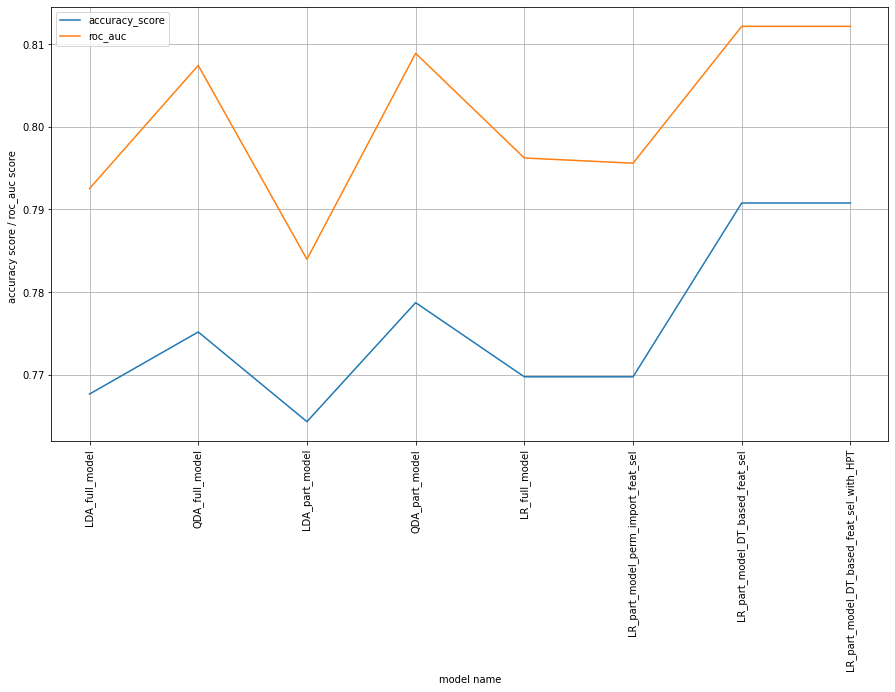

In [234]:
plt.figure(figsize=(15,8))
sns.lineplot(x=model_name,y=model_accuracy,label='accuracy_score')
sns.lineplot(x=model_name,y=model_roc_auc_score,label='roc_auc')
plt.ylabel('accuracy score / roc_auc score ')
plt.xlabel('model name')
plt.xticks(rotation=90)
plt.grid()
plt.show()


### Inference:
* Logistic Regression with selected features is best performing among these models. 
  * Important features: ['danceability', 'energy','speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'loudness']
* accuracy_score: 0.79
* roc_auc_score: 0.81